# City Weather
Use [citipy](https://pypi.python.org/pypi/citipy) to extract weather data from [OpenWeatherMap API](https://openweathermap.org/api), visualize the weather of 500+ cities across the world of varying distance from the equator:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv

from config import api_key
from citipy import citipy

In [ ]:
output_cities_file = "../output/cities.csv"
output_city_weather_file = "../output/city_weather.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

### Extract and export cities data

In [3]:
# List for holding lat_lngs and cities
lats_lngs_zip = []
cities = []
country_codes = []
lat = []
lng = []

# Create 1500 random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size= 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size= 1500)
lats_lngs_zip = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lats_lngs_zip:
    city_info = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_info.city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country_codes.append(city_info.country_code.upper())
        lat.append(round(lat_lng[0],2))
        lng.append(round(lat_lng[1],2))

In [4]:
# Print the city count to confirm sufficient count
len(cities), len(country_codes), len(lat), len(lng)

(624, 624, 624, 624)

In [5]:
# create a data frame for the cities
cities_df = pd.DataFrame({"Country": country_codes,
                          "City": cities,
                          "Lat": lat,
                          "Lng": lng})

# # Order the cities by country and city and add an ID
cities_df.sort_values(by=["Country", "City"], inplace=True)
cities_df.sort_values(by=["Country", "City"], inplace=True)
cities_df.reset_index(drop=True, inplace=True)
cities_df = cities_df[["Country", "City", "Lat", "Lng"]]
cities_df.head()

,Country,City,Lat,Lng
0,AF,geresk,31.71,63.44
1,AF,taywarah,33.81,64.52
2,AG,codrington,21.60,-52.43
3,AN,kralendijk,13.16,-65.76
4,AO,caconda,-13.39,15.44


In [6]:
# Save the city list to a csv file
# create output directory
if not os.path.isdir('../output'):
    os.makedirs('../output')
    
# Output cities data (CSV)
cities_df.to_csv(output_cities_file, index=False, header=True)

### Extract weather data from API calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
humidity = []
cloudiness = []
max_temperature = []
wind_speed = []
cities_with_weather_data = []
date = []
cities_log = []

In [8]:
# build OpenWeather API query url to get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
base_query_url = f"{url}appid={api_key}&units={units}&q="
base_query_url

'http://api.openweathermap.org/data/2.5/weather?appid=b0dc531704e9525b6dbd0b127eaee094&units=imperial&q='

In [9]:
# Get weather data from OpenWeather API

title = 'Begining Data Retrieval'
print("\n" + "-" * len(title))
print('Begining Data Retrieval')
print("-" * len(title) + "\n")

# print out starting time
start_utc = time.time()
start_utc_formated = time.gmtime(start_utc)
start_time = time.strftime("%m/%d/%y %H:%M", start_utc_formated)
# start_date = time.strftime("%m/%d/%y", start_utc_formated)
print(f"Started at {start_time} UTC\n")

for index, row in cities_df.iterrows():
    city = row['City']
    try: 
        query_url = base_query_url + city
        response = requests.get(query_url).json()
        
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]['all'])
        max_temperature.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        cities_with_weather_data.append(city)
        date.append(int(time.time())) 
        msg = f"Processing city with ID {index} | {city}"
        
    except Exception as e:
        
        if type(e) == KeyError:
            msg = f"...weather info not found for {city}. Skipping..."
        else:
            msg = f"...Other issue for city {city}. Skipping..."
               
    cities_log.append(msg)
    print(msg)

end_utc = time.time()
end_utc_formated = time.gmtime(end_utc)
end_time = time.strftime("%m/%d/%y %H:%M", end_utc_formated)
end_date = time.strftime("%m/%d/%y", end_utc_formated)

duration = round((end_utc - start_utc)/60, 2)

print(f"\nFinished at {end_time} UTC. {len(date)} row of records created")
print(f"Duration: {duration} minutes\n")


-----------------------
Begining Data Retrieval
-----------------------

Started at 03/03/19 02:29 UTC

...weather info not found for geresk. Skipping...
Processing city with ID 1 | taywarah
Processing city with ID 2 | codrington
Processing city with ID 3 | kralendijk
Processing city with ID 4 | caconda
Processing city with ID 5 | menongue
Processing city with ID 6 | namibe
Processing city with ID 7 | soyo
Processing city with ID 8 | mar del plata
Processing city with ID 9 | necochea
Processing city with ID 10 | rafaela
Processing city with ID 11 | rawson
Processing city with ID 12 | san rafael
Processing city with ID 13 | trelew
Processing city with ID 14 | ushuaia
Processing city with ID 15 | veinticinco de mayo
Processing city with ID 16 | viedma
Processing city with ID 17 | albany
Processing city with ID 18 | ballarat
Processing city with ID 19 | broome
Processing city with ID 20 | busselton
Processing city with ID 21 | byron bay
Processing city with ID 22 | carnarvon
Processing c

Processing city with ID 203 | booue
Processing city with ID 204 | ndjole
Processing city with ID 205 | port-gentil
Processing city with ID 206 | cayenne
Processing city with ID 207 | saint-georges
Processing city with ID 208 | axim
Processing city with ID 209 | tarkwa
...weather info not found for illoqqortoormiut. Skipping...
Processing city with ID 211 | ilulissat
Processing city with ID 212 | nanortalik
Processing city with ID 213 | narsaq
Processing city with ID 214 | nuuk
Processing city with ID 215 | paamiut
Processing city with ID 216 | qaanaaq
Processing city with ID 217 | sisimiut
Processing city with ID 218 | tasiilaq
Processing city with ID 219 | upernavik
Processing city with ID 220 | kankan
Processing city with ID 221 | saint-francois
...weather info not found for provaton. Skipping...
Processing city with ID 223 | iztapa
Processing city with ID 224 | atambua
...weather info not found for bengkulu. Skipping...
Processing city with ID 226 | biak
Processing city with ID 227 

Processing city with ID 409 | san vicente
Processing city with ID 410 | tagusao
Processing city with ID 411 | chaman
Processing city with ID 412 | garh maharaja
Processing city with ID 413 | jiwani
Processing city with ID 414 | peshawar
Processing city with ID 415 | shinpokh
Processing city with ID 416 | slawno
Processing city with ID 417 | saint-pierre
Processing city with ID 418 | camacha
Processing city with ID 419 | lagoa
Processing city with ID 420 | ponta delgada
Processing city with ID 421 | praia da vitoria
Processing city with ID 422 | ribeira grande
Processing city with ID 423 | vila franca do campo
Processing city with ID 424 | airai
Processing city with ID 425 | kloulklubed
Processing city with ID 426 | khor
Processing city with ID 427 | saint-joseph
Processing city with ID 428 | saint-philippe
Processing city with ID 429 | madaras
Processing city with ID 430 | aldan
Processing city with ID 431 | alekseyevsk
...weather info not found for amderma. Skipping...
Processing city

Processing city with ID 607 | dzaoudzi
Processing city with ID 608 | bredasdorp
Processing city with ID 609 | calvinia
Processing city with ID 610 | cape town
Processing city with ID 611 | east london
Processing city with ID 612 | hermanus
Processing city with ID 613 | kruisfontein
Processing city with ID 614 | margate
...weather info not found for mooi river. Skipping...
Processing city with ID 616 | port alfred
Processing city with ID 617 | port elizabeth
...weather info not found for potgietersrus. Skipping...
Processing city with ID 619 | richards bay
Processing city with ID 620 | saldanha
...weather info not found for umzimvubu. Skipping...
Processing city with ID 622 | kalabo
Processing city with ID 623 | mkushi

Finished at 03/03/19 02:32 UTC. 562 row of records created
Duration: 3.29 minutes



In [13]:
# Double check weather info was retraved for over 500 cities
len(humidity), len(cloudiness), len(max_temperature), len(wind_speed), len(cities_log)

(562, 562, 562, 562, 624)

### Merge cities and weather data and convert to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create a data frame with the weather info
weather_df = pd.DataFrame({
    "City": cities_with_weather_data,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Max Temp": max_temperature,
    "Wind Speed": wind_speed,
    "Date": date
})
weather_df.head()

,City,Humidity,Cloudiness,Max Temp,Wind Speed,Date
0,taywarah,79,12,14.34,2.73,1551580153
1,codrington,69,40,78.80,10.29,1551580153
2,kralendijk,74,56,78.80,16.11,1551580154
3,caconda,92,64,57.81,2.95,1551580154
4,menongue,97,24,59.97,2.39,1551580154


In [15]:
# merge weather data frame with city data frame
weather_with_country_df = pd.merge(weather_df, cities_df, on="City")
weather_with_country_df.head()

,City,Humidity,Cloudiness,Max Temp,Wind Speed,Date,Country,Lat,Lng
0,taywarah,79,12,14.34,2.73,1551580153,AF,33.81,64.52
1,codrington,69,40,78.80,10.29,1551580153,AG,21.60,-52.43
2,kralendijk,74,56,78.80,16.11,1551580154,AN,13.16,-65.76
3,caconda,92,64,57.81,2.95,1551580154,AO,-13.39,15.44
4,menongue,97,24,59.97,2.39,1551580154,AO,-15.86,19.07


In [16]:
# Re-order the columns
weather_with_country_df = weather_with_country_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
weather_with_country_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taywarah,12,AF,1551580153,79,33.81,64.52,14.34,2.73
1,codrington,40,AG,1551580153,69,21.60,-52.43,78.80,10.29
2,kralendijk,56,AN,1551580154,74,13.16,-65.76,78.80,16.11
3,caconda,64,AO,1551580154,92,-13.39,15.44,57.81,2.95
4,menongue,24,AO,1551580154,97,-15.86,19.07,59.97,2.39


In [17]:
# Output city weather data (CSV)
weather_with_country_df.to_csv(output_city_weather_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [18]:
# Organize data for plotting
terms = [["Max Temperature", "F"], ["Humidity", " (%)"],[ "Cloudiness", " (%)"], ["Wind Speed", " (mph)"]]
color = '#1177AA'

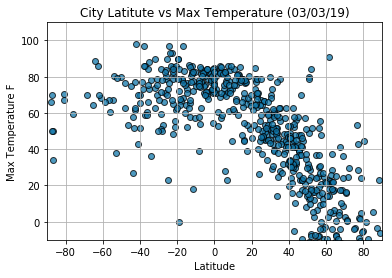

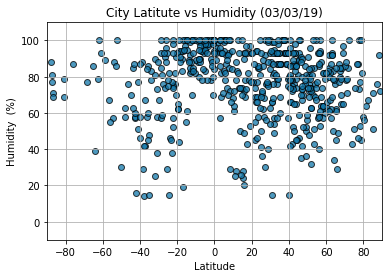

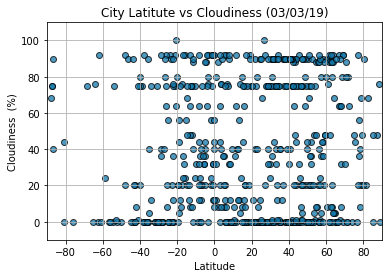

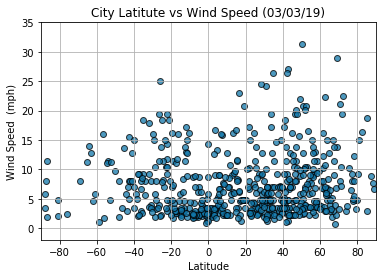

In [19]:
# Use subplot to plot the charts
for term in terms: 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
        
    # Set x limit, y limit
    ax.set_xlim(-90, 90)
    if term[0] == "Wind Speed":
        ax.set_ylim(-2, 35)
    else:
        ax.set_ylim(-10, 110)
    
    # Set title, xlabel, ylabel, and grid
    ax.set_title(f"City Latitute vs {term[0]} ({end_date})")
    ax.set_xlabel(f"Latitude")
    ax.set_ylabel(f"{term[0]} {term[1]}")
    plt.grid(True)
       
    # plot
    if term[0] == "Max Temperature":
        filename = "max_temp"
        ax.scatter(weather_with_country_df["Lat"], weather_with_country_df["Max Temp"], marker="o", facecolors=color, edgecolors="black", alpha=0.75)
    else:
        filename = term[0].lower()
        ax.scatter(weather_with_country_df["Lat"], weather_with_country_df[term[0]], marker="o", facecolors=color, edgecolors="black", alpha=0.75)
    
    # Save plot to file
    filename = filename + ".png"
    file_path = f"../output/{filename}"
    plt.savefig(file_path)
    plt.show()

#### Findings:

For this time of the year, we see the following patterns:
* The weather becomes significantly warmer as one approaches the equator (between -20 and 20 latitude).
* The northern hemisphere tends to be cooler than the northern hemisphere.
* There is no strong relationship between latitude and humidity.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong    band of cities sits at 0%, 80%, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. 